In [1]:
import numpy as np
import matplotlib.pyplot as plt

make_circles is a function from scikit-learn that generates a toy 2D dataset — points arranged in two concentric circles.

n_samples=300: create 300 total data points.

noise=0.1: adds a bit of random noise (so the circles aren’t perfectly clean).

factor=0.5: controls the scale of the inner circle (inner radius = 0.5 × outer radius).

random_state=0: ensures reproducibility (same random points every time).

The function returns:

X → a NumPy array of shape (300, 2) — the 2D coordinates of the points.

y → a NumPy array of shape (300,) — the class labels (0 or 1), telling you which circle each point belongs to.
X[:,0] → first feature (x-axis)

X[:,1] → second feature (y-axis)

c=y → colors the points according to their class label (0 or 1).

cmap=plt.cm.RdYlGn → red/yellow/green color map.

edgecolors='k' → adds a black border around each point.

s=50 → sets point size.
The result is a scatter plot with:

One circle (say, green) representing class 0

Another circle (say, red) representing class 1

(300, 2)
(300,)


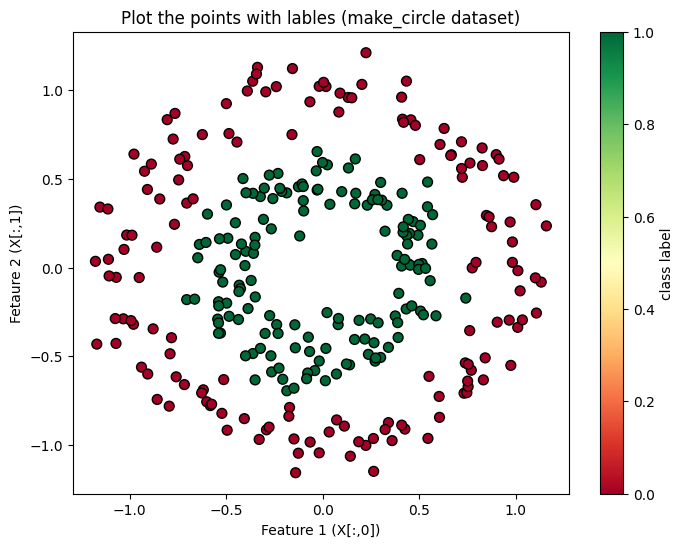

In [2]:
from sklearn.datasets import make_circles
# noise adds some disruption and make some data points to cross each other, HIGH NOISE = HIGH MIXING OF POINTS
#
# factors decide the space that has to be in between the datasets, HIGHER THE FACTOR (eg: 0.999), THEN THE TWO DATASET CIRCLES COMES CLOSER TO EACH OTHET BOUNDRIES
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)
print(X.shape)
print(y.shape)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k', marker='o', s=50)
plt.xlabel('Feature 1 (X[:,0])')
plt.ylabel('Fetaure 2 (X[:,1])')
plt.title("Plot the points with lables (make_circle dataset)")
plt.colorbar(label="class label")
plt.show()
#150 red, 150 green: total dataset 300 circles

(300, 2)
(300,)


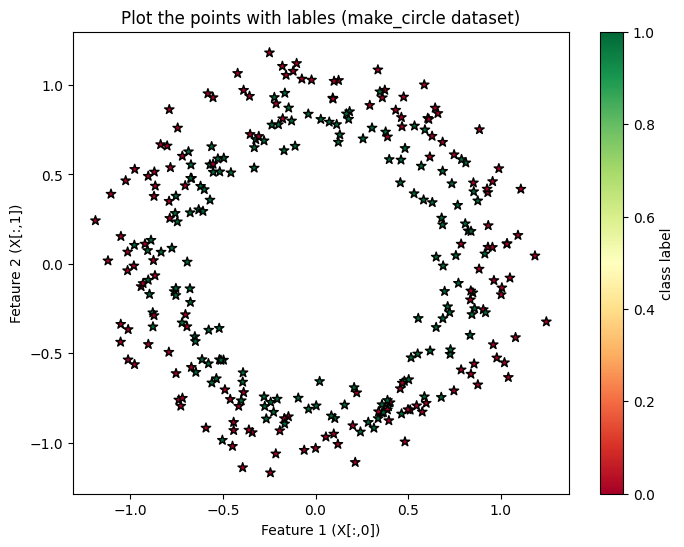

In [3]:
# WITHOUT RANDOM STATE THE OUTPUT GRAPH DIFFERS EVERY TIME AND NON REDUNDANT OUTPUT
X, y = make_circles(n_samples=300, noise=0.1, factor=0.8)
print(X.shape)
print(y.shape)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlGn, edgecolors='k', marker='*', s=50)
plt.xlabel('Feature 1 (X[:,0])')
plt.ylabel('Fetaure 2 (X[:,1])')
plt.title("Plot the points with lables (make_circle dataset)")
plt.colorbar(label="class label")
plt.show()

the goal of the MLP is to learn a boundary that separates the inner circle from the outer circle.


In [4]:
from sklearn.neural_network import MLPClassifier    # feedforward neural network for classification tasks.
import ipywidgets as widgets                        # used to create the slider and update the plot.
from IPython.display import display
from ipywidgets import interactive

# the below function runs evertytime the slider changes or slided to other value
def update_plot(hidden_layer_size):

  # Multilayer Perceptron (MLP) is a type of feedforward ANN for classification.
  # hidden_layer_sizes=(hidden_layer_size,) This decides how many neurons and how many hidden layers your neural network will have.
  #        (hidden_layer_size,):...... means one hidden layer with hidden_layer_size neurons.
  #        it is stored in tuple form, so it specifies the number of hidden layer and number of neurons: ex: (5,): 1 HL and 5 neurons, (5,4): 2HL[1ST: 5 NEURONS, 2ND: 4NEURONS]


  # max_iter are like the epoch for the model, useful if model needs more training time.
  # ReLU (Rectified Linear Unit): f(x) = max(0, x) acyivation function, Relu gives curved boundries for classification
  # random state for same OUTPUT.

# clf.fit
  # X  → input features (2D points — like from make_circles)
  # y  → correct labels (class 0 or 1 for each point)
  # every input sample in X: The input values (e.g., two features like x₁ and x₂) go into the network.
  # Each neuron computes a weighted sum (bias also present): w1x1 + w2x2 + b
  #  then applies activation function  (ReLu here)
  #  compute loss, backpropogate, update weight through multiple mathematical functions.

  clf=MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),
                    activation='relu',
                    max_iter=3000,
                    random_state=1)
  clf.fit(X,y)

# 2D Numpy array feature 1 and feature 2 (class 1 and 0)
  # X[:, 0] means	all values of feature 1 (x-axis)
  # X[:, 1]	means all values of feature 2 (y-axis)
  # linspace seprates the values inside with even space the default is 50 spread.

  x_vals=np.linspace(X[:,0].min() - 0.1, X[:,0].max() + 0.1)        #min value of feature 1 - 0.1; max value of feature 2 + 0.1,
                                                                    #done so that data point contain even space dont cut each other
  y_vals=np.linspace(X[:,1].min() - 0.1, X[:,1].max() + 0.1)        # this will give multiple data points pairs as linspace() adds multiple value: (0.8,4.1), (0.9,3.9)....
  X_plane,Y_plane=np.meshgrid(x_vals,y_vals)                        # creates a grid of (x,y) pairs;


# Ravel converts the 2d grid values that arre for plotting to 1d array for prediction
  grid_points=np.column_stack((X_plane.ravel(),Y_plane.ravel()))    # combines the x_plane and y_plane ravel values
  Z=clf.predict(grid_points)                                        # Making predictions
  Z=Z.reshape(X_plane.shape)                                        # reshape predictions on mesh grid
  y_pred=clf.predict(X)                 #for model evaluation on real time data X(original feature matrix), predicted lables for real training data

#PLOTTING
  plt.clf()       # ensures the canvas clear and fresh each time (like the slider)

  # Z is predicted class(0 or 1), x_plane and y_plane:coordinates of the grid, levels define colour cutoff boundries between 0 and 1, cmap = colours, alpha for transparency

  plt.contourf(X_plane, Y_plane, Z, levels=[-0.5,0.5,1.5], cmap = plt.cm.RdYlGn, alpha = 0.6)

  # masking helps in plotting
  class_0 = y_pred == 0    #creates a boolean mask for all points that were predicted as class 0.
  class_1 = y_pred == 1    #creates a boolean mask for all points that were predicted as class 1.

# X[class_0, 0] is feature 1 (x-axis) values only for class 0; X[class_0, 1] is feature 2 (y-axis) values only for class 0
  plt.scatter(X[class_0, 0], X[class_0, 1], c = 'red', edgecolors='k', marker = 'o', s = 50, label = 'predicted class 0')
  plt.scatter(X[class_1, 0], X[class_1, 1], c = 'green', edgecolors='k', marker = 'o', s = 50, label='predicted class 1')

  plt.xlabel('feature 1')
  plt.ylabel('feature 2')

  plt.title(f'decision boundries and predicted labels (hidden layer size = {hidden_layer_size})')

  plt.legend()
  plt.show()

hidden_layer_size_slider=widgets.IntSlider(value=1, min = 1, max = 5, step = 1, description='hidden layer size')

interactive_plot=interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)  #for updation if slider adjusted

display(interactive_plot)

interactive(children=(IntSlider(value=1, description='hidden layer size', max=5, min=1), Output()), _dom_class…